<h1>Análise Exploratória da base Indicadores de Fluxo da Educação Superior 2010-2019</h1>
<h2>LAABDDEEAD8 - FLAVIO_TOKUO - TCC - Análise de Big Data - Data Engineering</h2>

In [1]:
import pandas as pd
import pyspark.sql.functions as fn
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
display(HTML("<style>pre { white-space: pre !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
spark = (SparkSession.builder
         .config("spark.jars","""/home/jovyan/jars/aws-java-sdk-core-1.11.534.jar,
                                 /home/jovyan/jars/aws-java-sdk-dynamodb-1.11.534.jar,
                                 /home/jovyan/jars/aws-java-sdk-s3-1.11.534.jar,
                                 /home/jovyan/jars/hadoop-aws-3.2.2.jar""")
         .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000")
         .config("spark.hadoop.fs.s3a.access.key", "aulafia")
         .config("spark.hadoop.fs.s3a.secret.key", "aulafia@123")
         .config("spark.hadoop.fs.s3a.path.style.access", True)
         .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem")
         .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider")
         .getOrCreate()
        )

In [3]:
df_indicadores_bronze = spark.read.format('parquet').load('s3a://bronze/inep/educacao_superior/indicadores_fluxo_educacao_superior')
df_indicadores_bronze.show(12, False)

+------+-----------------------------------+---------------------------+------------------------+--------+-------------------+---------+-----+------------+-----------------+--------------------+--------------+--------------+------------------+------------------------------------------+---------------+-----------------+-----------------------+---------------------+-----------------------+----------------------------+--------------+--------------+-------------+--------------+-----------+------------------+------------------+------------------+------------------+------------------+
|CO_IES|NO_IES                             |TP_CATEGORIA_ADMINISTRATIVA|TP_ORGANIZACAO_ACADEMICA|CO_CURSO|NO_CURSO           |CO_REGIAO|CO_UF|CO_MUNICIPIO|TP_GRAU_ACADEMICO|TP_MODALIDADE_ENSINO|CO_CINE_ROTULO|NO_CINE_ROTULO|CO_CINE_AREA_GERAL|NO_CINE_AREA_GERAL                        |NU_ANO_INGRESSO|NU_ANO_REFERENCIA|NU_PRAZO_INTEGRALIZACAO|NU_ANO_INTEGRALIZACAO|NU_PRAZO_ACOMPANHAMENTO|NU_ANO_MAXIMO_ACOMPANHAM

In [4]:
df_indicadores_bronze_pandas = df_indicadores_bronze.toPandas()

In [5]:
# df_indicadores_bronze.printSchema()

<h1>Verificação de Missing Values</h1>

In [6]:
df_indicadores_bronze_pandas.isnull().sum()

CO_IES                             0
NO_IES                             0
TP_CATEGORIA_ADMINISTRATIVA        0
TP_ORGANIZACAO_ACADEMICA           0
CO_CURSO                           0
NO_CURSO                           0
CO_REGIAO                       6970
CO_UF                           6970
CO_MUNICIPIO                    6970
TP_GRAU_ACADEMICO                  0
TP_MODALIDADE_ENSINO               0
CO_CINE_ROTULO                     0
NO_CINE_ROTULO                     0
CO_CINE_AREA_GERAL                 0
NO_CINE_AREA_GERAL                 0
NU_ANO_INGRESSO                    0
NU_ANO_REFERENCIA                  0
NU_PRAZO_INTEGRALIZACAO            0
NU_ANO_INTEGRALIZACAO              0
NU_PRAZO_ACOMPANHAMENTO            0
NU_ANO_MAXIMO_ACOMPANHAMENTO       0
QT_INGRESSANTE                     0
QT_PERMANENCIA                     0
QT_CONCLUINTE                      0
QT_DESISTENCIA                     0
QT_FALECIDO                        0
TAP                                0
T

In [7]:
df_indicadores_bronze.filter(fn.col('CO_UF').isNull()).select(fn.col("*")).distinct().show(12, False)

+------+----------------------------------+---------------------------+------------------------+--------+---------------------------+---------+-----+------------+-----------------+--------------------+--------------+---------------------------------------------+------------------+---------------------------------+---------------+-----------------+-----------------------+---------------------+-----------------------+----------------------------+--------------+--------------+-------------+--------------+-----------+------------------+------------------+------------------+-------------------+-------------------+
|CO_IES|NO_IES                            |TP_CATEGORIA_ADMINISTRATIVA|TP_ORGANIZACAO_ACADEMICA|CO_CURSO|NO_CURSO                   |CO_REGIAO|CO_UF|CO_MUNICIPIO|TP_GRAU_ACADEMICO|TP_MODALIDADE_ENSINO|CO_CINE_ROTULO|NO_CINE_ROTULO                               |CO_CINE_AREA_GERAL|NO_CINE_AREA_GERAL               |NU_ANO_INGRESSO|NU_ANO_REFERENCIA|NU_PRAZO_INTEGRALIZACAO|NU_ANO_INT

<h1>Verificação das Frequências nas Variáveis Qualitativas</h1>

<h2>Variáveis com mais de 100 valores distintos</h2>

In [8]:
df_indicadores_bronze_pandas[["CO_IES", "NO_IES"]].nunique()

CO_IES    2218
NO_IES    2187
dtype: int64

In [58]:
print(df_indicadores_bronze.select(fn.col("CO_IES"), fn.col("NO_IES")).distinct()
     .groupBy(fn.col("NO_IES")).agg(fn.count('*').alias('cnt')).where(fn.count('*') > 1)
     .show(50, False)
)

print(df_indicadores_bronze.select(fn.col("CO_IES"), fn.col("NO_IES")).distinct()
    .filter(fn.col('NO_IES') == 'FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ')
    .show(50, False)
)

+-----------------------------------------------------------------------+---+
|NO_IES                                                                 |cnt|
+-----------------------------------------------------------------------+---+
|FACULDADE PARANAENSE                                                   |2  |
|FACULDADE SÃO CAMILO                                                   |2  |
|FACULDADE SANTA RITA                                                   |2  |
|FACULDADE DE CIÊNCIAS SOCIAIS APLICADAS                                |4  |
|FACULDADE SANTA MARIA                                                  |2  |
|CENTRO UNIVERSITÁRIO LEONARDO DA VINCI                                 |2  |
|FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ|6  |
|FACULDADE PRISMA                                                       |2  |
|FACULDADE DELTA                                                        |2  |
|FACULDADE METROPOLITANA SÃO CARLOS                             

In [40]:
df_indicadores_bronze_pandas[["CO_CURSO", "NO_CURSO"]].nunique()

CO_CURSO    25923
NO_CURSO      979
dtype: int64

In [70]:
print(df_indicadores_bronze.select(fn.col("CO_CURSO"), fn.col("NO_CURSO")).distinct()
     .groupBy(fn.col("NO_CURSO")).agg(fn.count('*').alias('cnt')).where("NO_CURSO like '%COMPUTAÇÃO%'")
     .orderBy("cnt", ascending=True)
     .show(100, False)
)

print(df_indicadores_bronze.select(fn.col("CO_CURSO"), fn.col("NO_CURSO")).distinct()
    .filter(fn.col('NO_CURSO') == 'CIÊNCIAS DA COMPUTAÇÃO')
    .show(50, False)
)

+-------------------------------------------------------------------------------------------+---+
|NO_CURSO                                                                                   |cnt|
+-------------------------------------------------------------------------------------------+---+
|ENGENHARIA ELETRÔNICA E DE COMPUTAÇÃO                                                      |1  |
|ENGENHARIA ELÉTRICA  - ÊNFASE EM COMPUTAÇÃO                                                |1  |
|MATEMÁTICA APLICADA E COMPUTAÇÃO CIENTÍFICA                                                |1  |
|ENGENHARIA DE COMPUTAÇÃO E INFORMAÇÃO                                                      |1  |
|CIÊNCIAS DE COMPUTAÇÃO                                                                     |1  |
|SEGUNDA LICENCIATURA EM COMPUTAÇÃO PARA PROFESSORES EM EXERCÍCIO NA EDUCAÇÃO BÁSICA PÚBLICA|1  |
|SISTEMAS DE COMPUTAÇÃO                                                                     |1  |
|COMUNICAÇÃO EM COMP

<b>Municipio</b>

In [15]:
df_indicadores_bronze.filter(fn.col("CO_MUNICIPIO").isNull()).count()

6970

In [71]:
df_indicadores_bronze_pandas["CO_MUNICIPIO"].nunique()

1085

<b>CO_CINE_ROTULO e NO_CINE_ROTULO</b>

In [72]:
df_indicadores_bronze_pandas[["CO_CINE_ROTULO", "NO_CINE_ROTULO"]].nunique()

CO_CINE_ROTULO    329
NO_CINE_ROTULO    329
dtype: int64

<h2>Frequência das Demais variáveis da base</h2>

In [9]:
def graf_value_counts(dataframe, variavel): 
    # Calcular a contagem normalizada dos valores
    categoria_counts = dataframe[variavel].value_counts(normalize=True)
    
    # Calcular a contagem não normalizada dos valores
    categoria_counts_absolute = dataframe[variavel].value_counts()

    # Criar o gráfico de barras
    plt.figure(figsize=(8, 6))
    ax = categoria_counts.plot(kind='bar', color='#6ADBD9')

    # Adicionar percentuais acima das barras com espaço
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=14)

    # Adicionar rótulos e título ao gráfico
    plt.xlabel(f"{variavel}", fontsize=14)
    plt.ylabel('Percentual', fontsize=14)
    plt.title(f'Distribuição dos Valores Únicos de {variavel}', fontsize=14)

    plt.xticks(rotation=45)
    
    # Definindo o tamanho da fonte nos rótulos do eixo x e y
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Exibir o gráfico
    plt.tight_layout()

    # Formatar a contagem não normalizada com separador de milhares
    categoria_counts_absolute_formatted = categoria_counts_absolute.apply(lambda x: f'{x:,}')

    # Calcular o total das contagens não normalizadas
    total_contagens = categoria_counts_absolute.sum()

    # Exibir contagem não normalizada dentro de uma caixa com fonte maior
    plt.text(1.05, 0.2, "Distribuição dos Valores Únicos não Normalizada\n\n" + 
             pd.DataFrame({f'{variavel}': categoria_counts_absolute.index, '(Qtde.)': categoria_counts_absolute_formatted}).to_string(index=False) +
             f"\n\nTotal: {total_contagens:,}",  # Adicionar a linha do total
             fontsize=14,  # Ajustar o tamanho da fonte
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.4'))

    plt.show()

In [10]:
def graf_value_counts_v2(dataframe, variavel): 
    # Calcular a contagem normalizada dos valores
    categoria_counts = dataframe[variavel].value_counts(normalize=True)
    
    # Calcular a contagem não normalizada dos valores
    categoria_counts_absolute = dataframe[variavel].value_counts()

    # Criar o gráfico de barras
    plt.figure(figsize=(8, 6))
    categoria_counts.plot(kind='bar', color='#6ADBD9')

    # Adicionar rótulos e título ao gráfico
    plt.xlabel(f"{variavel}", fontsize=16)
    plt.ylabel('Percentual', fontsize=16)
    plt.title(f'Distribuição dos Valores Únicos de {variavel}', fontsize=14)

    plt.xticks(rotation=45)

    # Exibir o gráfico
    plt.tight_layout()

    # Formatar a contagem não normalizada com separador de milhares
    categoria_counts_absolute_formatted = categoria_counts_absolute.apply(lambda x: f'{x:,}')

    # Calcular o total das contagens não normalizadas
    total_contagens = categoria_counts_absolute.sum()

    # Exibir contagem não normalizada dentro de uma caixa com fonte maior
    plt.text(1.05, 0.5, "Distribuição dos Valores Únicos não Normalizada\n\n" + 
             pd.DataFrame({f'{variavel}': categoria_counts_absolute.index, '(Qtde.)': categoria_counts_absolute_formatted}).to_string(index=False) +
             f"\n\nTotal: {total_contagens:,}",  # Adicionar a linha do total
             fontsize=14,  # Ajustar o tamanho da fonte
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

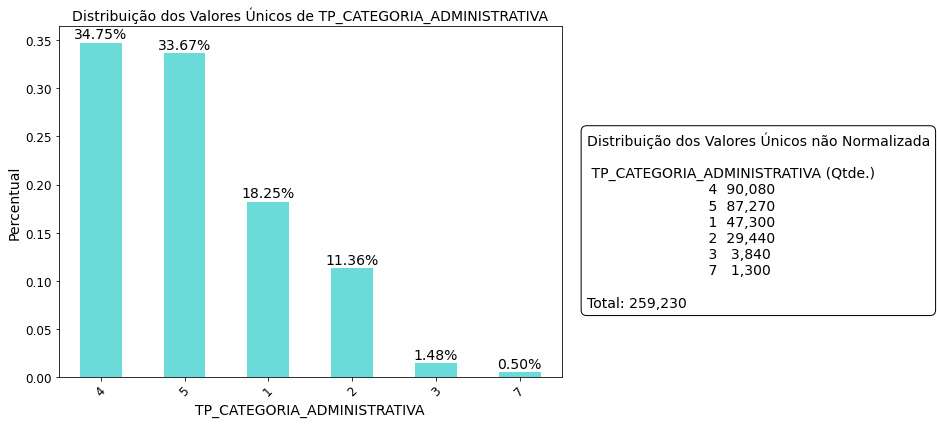

In [11]:
graf_value_counts(df_indicadores_bronze_pandas, 'TP_CATEGORIA_ADMINISTRATIVA')

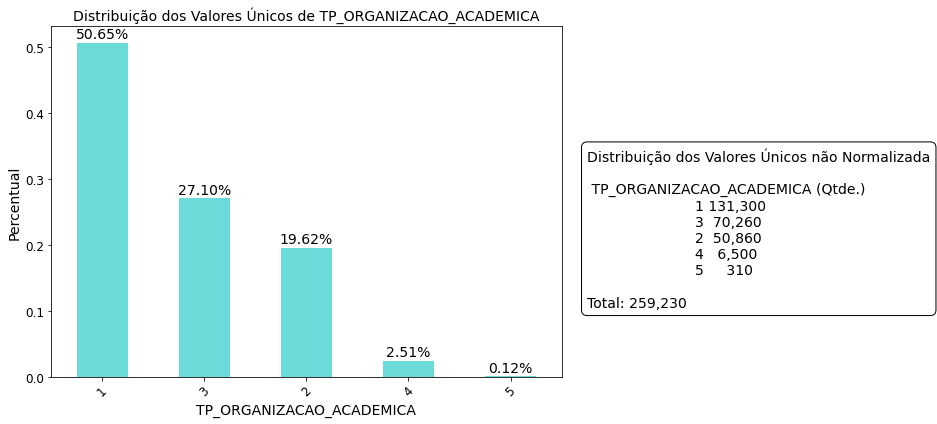

In [12]:
graf_value_counts(df_indicadores_bronze_pandas, 'TP_ORGANIZACAO_ACADEMICA')

In [13]:
df_indicadores_bronze.filter(fn.col("CO_REGIAO").isNull()).count()

6970

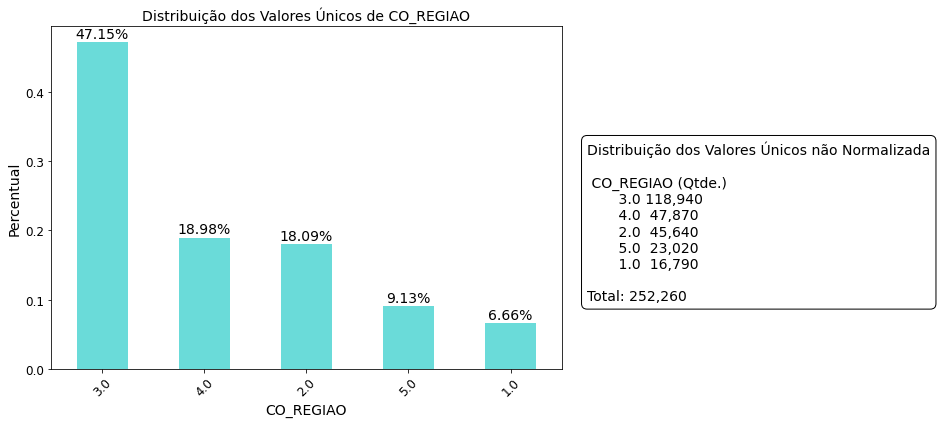

In [14]:
graf_value_counts(df_indicadores_bronze_pandas, 'CO_REGIAO')

In [15]:
df_indicadores_bronze.filter(fn.col("CO_UF").isNull()).count()

6970

In [16]:
df_indicadores_bronze_pandas[["CO_UF"]].nunique()

CO_UF    27
dtype: int64

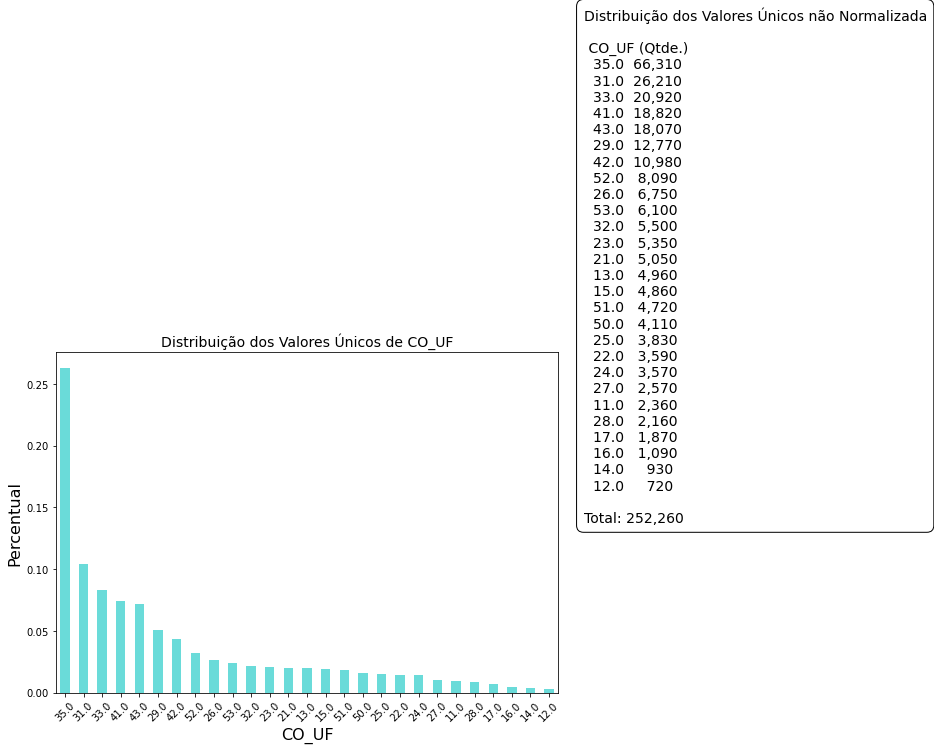

In [17]:
graf_value_counts_v2(df_indicadores_bronze_pandas, 'CO_UF')

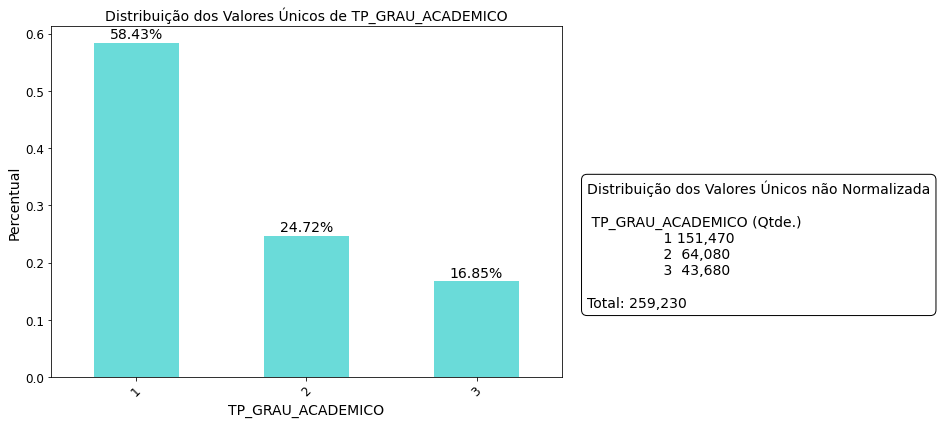

In [18]:
graf_value_counts(df_indicadores_bronze_pandas, 'TP_GRAU_ACADEMICO')

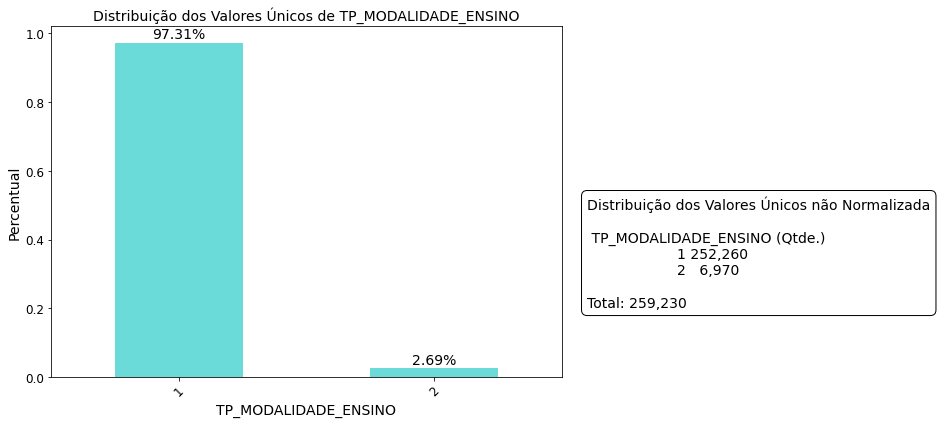

In [19]:
graf_value_counts(df_indicadores_bronze_pandas, 'TP_MODALIDADE_ENSINO')

In [20]:
df_indicadores_bronze_pandas[["CO_CINE_AREA_GERAL", "NO_CINE_AREA_GERAL"]].nunique()

CO_CINE_AREA_GERAL    10
NO_CINE_AREA_GERAL    10
dtype: int64

In [21]:
df_indicadores_bronze_pandas['NO_CINE_AREA_GERAL'].value_counts()
# graf_value_counts(df_indicadores_bronze_pandas, 'NO_CINE_AREA_GERAL')

Negócios, administração e direito                             66450
Educação                                                      64200
Saúde e bem-estar                                             34440
Engenharia, produção e construção                             30150
Computação e Tecnologias da Informação e Comunicação (TIC)    17190
Ciências sociais, comunicação e informação                    14660
Artes e humanidades                                           11240
Ciências naturais, matemática e estatística                    7350
Agricultura, silvicultura, pesca e veterinária                 7070
Serviços                                                       6480
Name: NO_CINE_AREA_GERAL, dtype: int64

In [23]:
def graf_value_counts_v3(dataframe, variavel): 
    # Calcular a contagem normalizada dos valores
    categoria_counts = dataframe[variavel].value_counts(normalize=True)
    
    # Calcular a contagem não normalizada dos valores
    categoria_counts_absolute = dataframe[variavel].value_counts()

    # Criar o gráfico de barras com mais altura
    plt.figure(figsize=(10, 8))  # Aumente a altura do gráfico
    ax = categoria_counts.plot(kind='bar', color='#6ADBD9')

    # Ajustar espaço entre os rótulos do eixo X
    plt.xticks(rotation=45, ha='right')

    # Adicionar percentuais acima das barras com fonte menor e ajustar o espaçamento
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=12)  # Fonte menor

    # Adicionar rótulos e título ao gráfico
    plt.xlabel(f"{variavel}", fontsize=14)
    plt.ylabel('Percentual', fontsize=14)
    plt.title(f'Distribuição dos Valores Únicos de {variavel}', fontsize=14)

    # Exibir o gráfico
    plt.tight_layout()
    
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Ajustar a área do gráfico das contagens não normalizadas
    plt.text(1.05, 0.2, "Distribuição dos Valores Únicos não Normalizada\n\n" + 
             pd.DataFrame({f'{variavel}': categoria_counts_absolute.index, '(Qtde.)': categoria_counts_absolute}).to_string(index=False) +
             f"\n\nTotal: {sum(categoria_counts_absolute):,}",  # Adicionar a linha do total
             fontsize=12,  # Ajustar o tamanho da fonte
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.2'))

    plt.show()

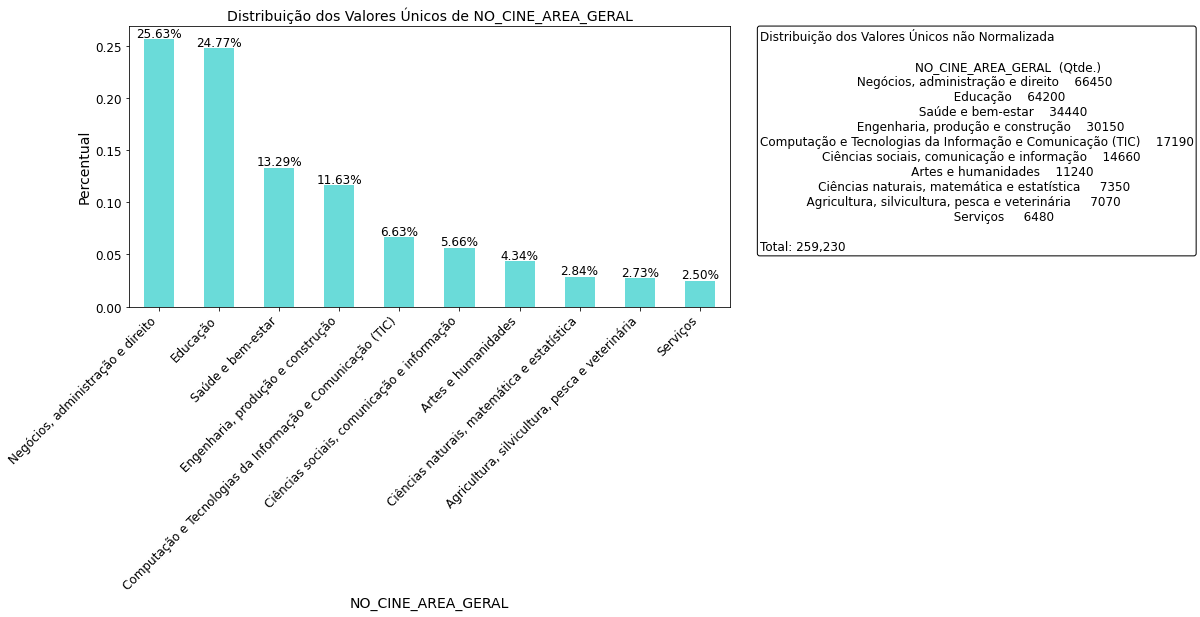

In [24]:
graf_value_counts_v3(df_indicadores_bronze_pandas, 'NO_CINE_AREA_GERAL')

In [25]:
df_indicadores_bronze.select(fn.col("NU_ANO_INGRESSO")).distinct().show(12, False)

+---------------+
|NU_ANO_INGRESSO|
+---------------+
|2010           |
+---------------+



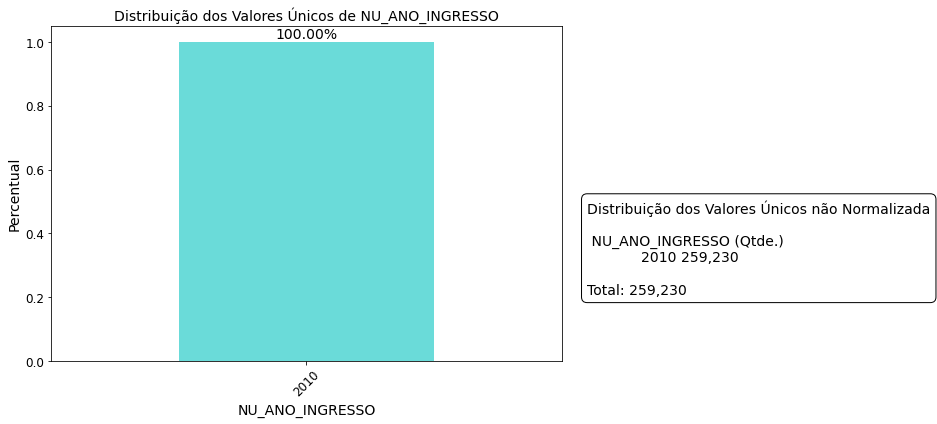

In [26]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_ANO_INGRESSO')

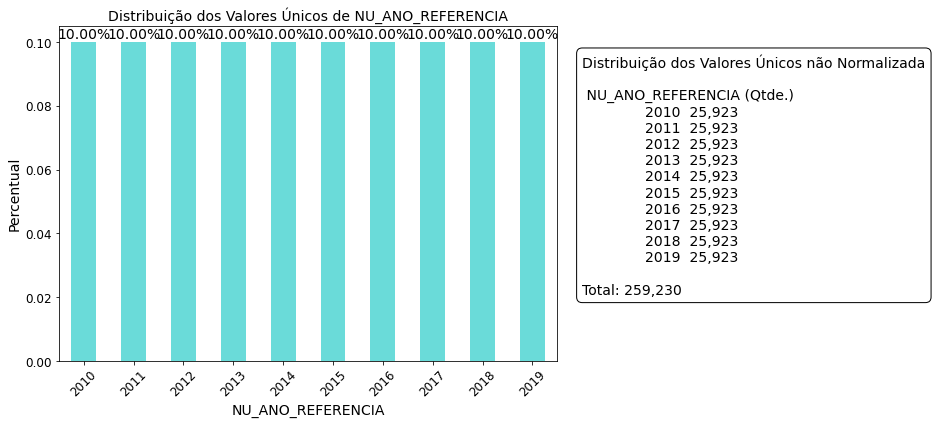

In [27]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_ANO_REFERENCIA')

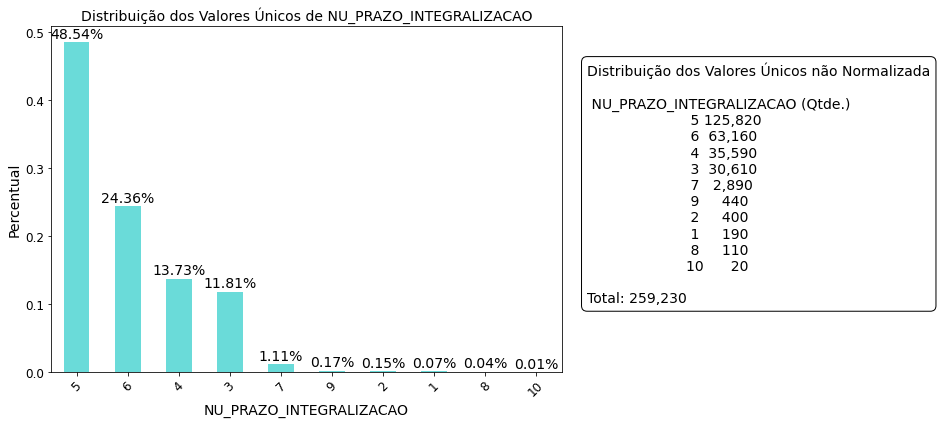

In [28]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_PRAZO_INTEGRALIZACAO')

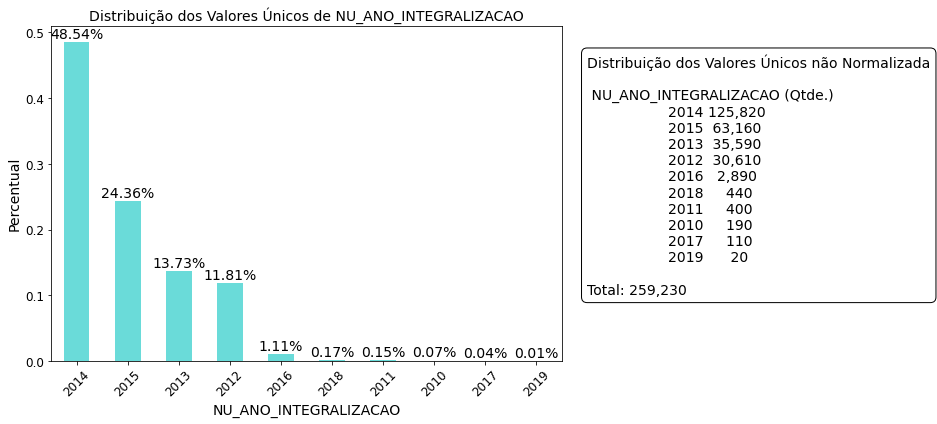

In [29]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_ANO_INTEGRALIZACAO')

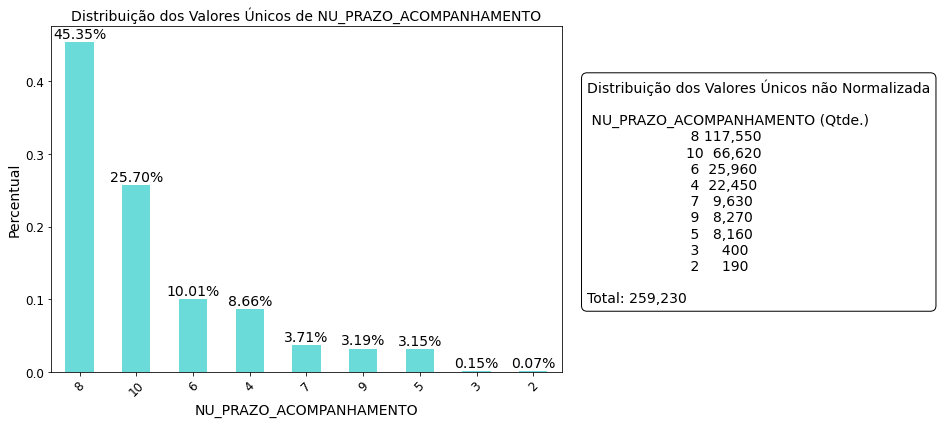

In [30]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_PRAZO_ACOMPANHAMENTO')

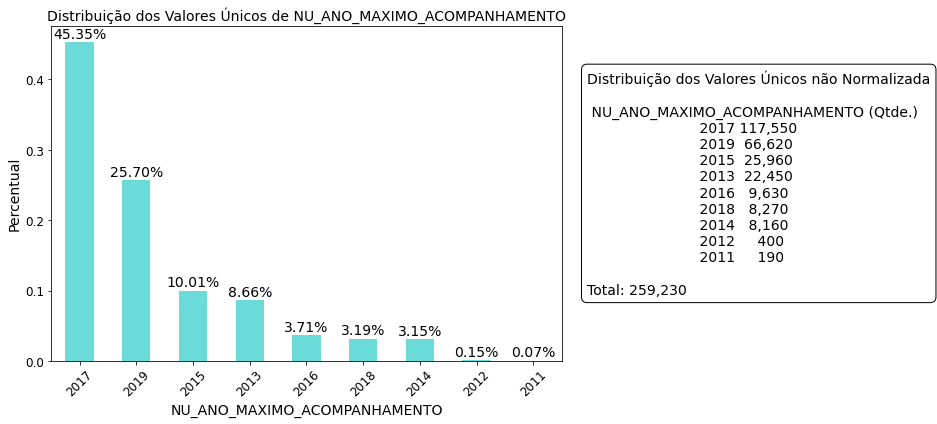

In [31]:
graf_value_counts(df_indicadores_bronze_pandas, 'NU_ANO_MAXIMO_ACOMPANHAMENTO')

<h1>Análise Descritiva das Variáveis Qualitativas</h1>

In [32]:
# descr_matrix = df_indicadores_bronze_pandas.describe()
# round(descr_matrix, 2)

In [33]:
descr_matrix_group_var1 = df_indicadores_bronze_pandas[['CO_IES', 
                                                        'TP_CATEGORIA_ADMINISTRATIVA',
                                                        'TP_ORGANIZACAO_ACADEMICA',
                                                        'CO_CURSO',
                                                        'CO_REGIAO',
                                                        'CO_UF',
                                                        'CO_MUNICIPIO',
                                                        'TP_GRAU_ACADEMICO',
                                                        'TP_MODALIDADE_ENSINO',
                                                        'CO_CINE_AREA_GERAL',
                                                        'NU_ANO_INGRESSO',
                                                        'NU_ANO_REFERENCIA',
                                                        'NU_PRAZO_INTEGRALIZACAO',
                                                        'NU_ANO_INTEGRALIZACAO',
                                                        'NU_PRAZO_ACOMPANHAMENTO',
                                                        'NU_ANO_MAXIMO_ACOMPANHAMENTO']].describe()
round(descr_matrix_group_var1)

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_REGIAO,CO_UF,CO_MUNICIPIO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_AREA_GERAL,NU_ANO_INGRESSO,NU_ANO_REFERENCIA,NU_PRAZO_INTEGRALIZACAO,NU_ANO_INTEGRALIZACAO,NU_PRAZO_ACOMPANHAMENTO,NU_ANO_MAXIMO_ACOMPANHAMENTO
count,259230.0,259230.0,259230.0,259230.0,252260.0,252260.0,252260.0,259230.0,259230.0,259230.0,259230.0,259230.0,259230.0,259230.0,259230.0,259230.0
mean,1598.0,4.0,2.0,251850.0,3.0,34.0,3427300.0,2.0,1.0,5.0,2010.0,2014.0,5.0,2014.0,8.0,2017.0
std,2643.0,2.0,1.0,677282.0,1.0,9.0,915445.0,1.0,0.0,3.0,0.0,3.0,1.0,1.0,2.0,2.0
min,1.0,1.0,1.0,1.0,1.0,11.0,1100023.0,1.0,1.0,1.0,2010.0,2010.0,1.0,2010.0,2.0,2011.0
25%,322.0,2.0,1.0,31959.0,3.0,31.0,3103504.0,1.0,1.0,2.0,2010.0,2012.0,4.0,2013.0,7.0,2016.0
50%,641.0,4.0,1.0,77274.0,3.0,35.0,3513009.0,1.0,1.0,4.0,2010.0,2014.0,5.0,2014.0,8.0,2017.0
75%,1803.0,5.0,3.0,111884.0,4.0,41.0,4106902.0,2.0,1.0,7.0,2010.0,2017.0,6.0,2015.0,10.0,2019.0
max,23410.0,7.0,5.0,5001242.0,5.0,53.0,5300108.0,3.0,2.0,10.0,2010.0,2019.0,10.0,2019.0,10.0,2019.0


<h1>Análise Descritiva das Variáveis Quantitativas</h1>

In [34]:
descr_matrix_group_var2 = df_indicadores_bronze_pandas[['QT_INGRESSANTE',
                                                        'QT_PERMANENCIA',
                                                        'QT_CONCLUINTE',
                                                        'QT_DESISTENCIA',
                                                        'QT_FALECIDO']].describe()
round(descr_matrix_group_var2,2)

,QT_INGRESSANTE,QT_PERMANENCIA,QT_CONCLUINTE,QT_DESISTENCIA,QT_FALECIDO
count,259230.00,259230.00,259230.00,259230.00,259230.00
mean,99.27,28.47,3.93,5.90,0.00
std,305.74,112.91,29.47,40.49,0.07
min,4.00,0.00,0.00,0.00,0.00
25%,32.00,0.00,0.00,0.00,0.00
50%,57.00,5.00,0.00,1.00,0.00
75%,102.00,31.00,2.00,5.00,0.00
max,26946.00,15180.00,5854.00,11765.00,10.00


In [35]:
descr_matrix_group_var3 = df_indicadores_bronze_pandas[['TAP', 'TCA', 'TDA', 'TCAN', 'TADA']].describe()
round(descr_matrix_group_var3,2)

,TAP,TCA,TDA,TCAN,TADA
count,259230.00,259230.00,259230.00,259230.00,259230.00
mean,28.91,25.93,45.17,4.07,5.84
std,35.12,25.19,27.60,9.94,10.95
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,23.20,0.00,0.00
50%,8.33,21.74,45.10,0.00,1.25
75%,58.58,44.19,65.00,2.94,7.14
max,100.00,100.00,100.00,100.00,100.00


In [36]:
descr_matrix_group_var3 = df_indicadores_bronze_pandas[['TAP', 'TCA', 'TDA', 'TCAN', 'TADA']].describe()
print(round(descr_matrix_group_var3,2))

             TAP        TCA        TDA       TCAN       TADA
count  259230.00  259230.00  259230.00  259230.00  259230.00
mean       28.91      25.93      45.17       4.07       5.84
std        35.12      25.19      27.60       9.94      10.95
min         0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00      23.20       0.00       0.00
50%         8.33      21.74      45.10       0.00       1.25
75%        58.58      44.19      65.00       2.94       7.14
max       100.00     100.00     100.00     100.00     100.00


<h1>Verificação da Correlação entre as variáveis</h1>

In [38]:
# # df_indicadores_bronze_pandas.dtypes
# correc_matrix = df_indicadores_bronze_pandas.corr()
# # round(correc_matrix,1)
# fig, ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(round(correc_matrix,1), linewidths=.3, annot=True);

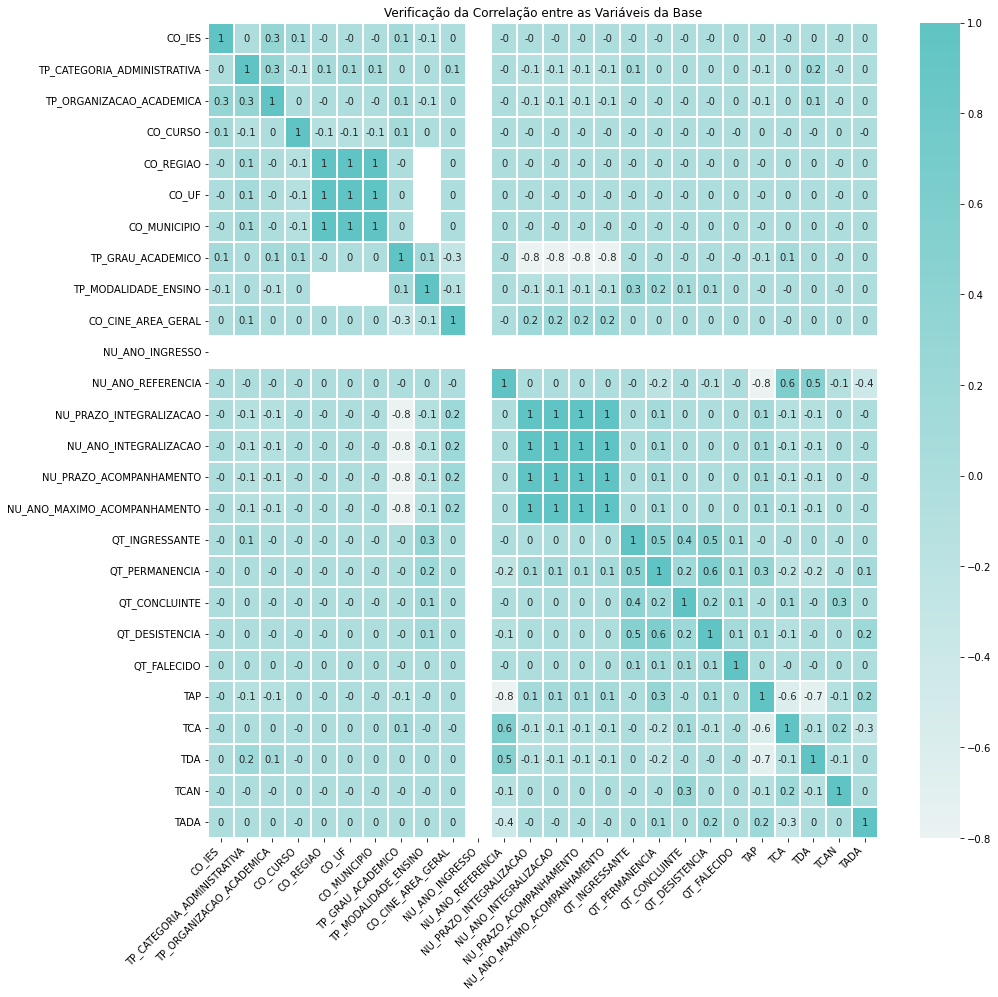

In [39]:
# Calcula a matriz de correlação
correc_matrix = df_indicadores_bronze_pandas.corr()

# Define a paleta de cores "#6ADBD9"   #5A9
palette = sns.color_palette("light:#5FC4C3", as_cmap=True)

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 15))

# Plota o heatmap utilizando a paleta de cores definida
heatmap = sns.heatmap(round(correc_matrix, 1), linewidths=0.3, annot=True, cmap=palette, ax=ax)

ax.set_title("Verificação da Correlação entre as Variáveis da Base")

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right")

plt.show()


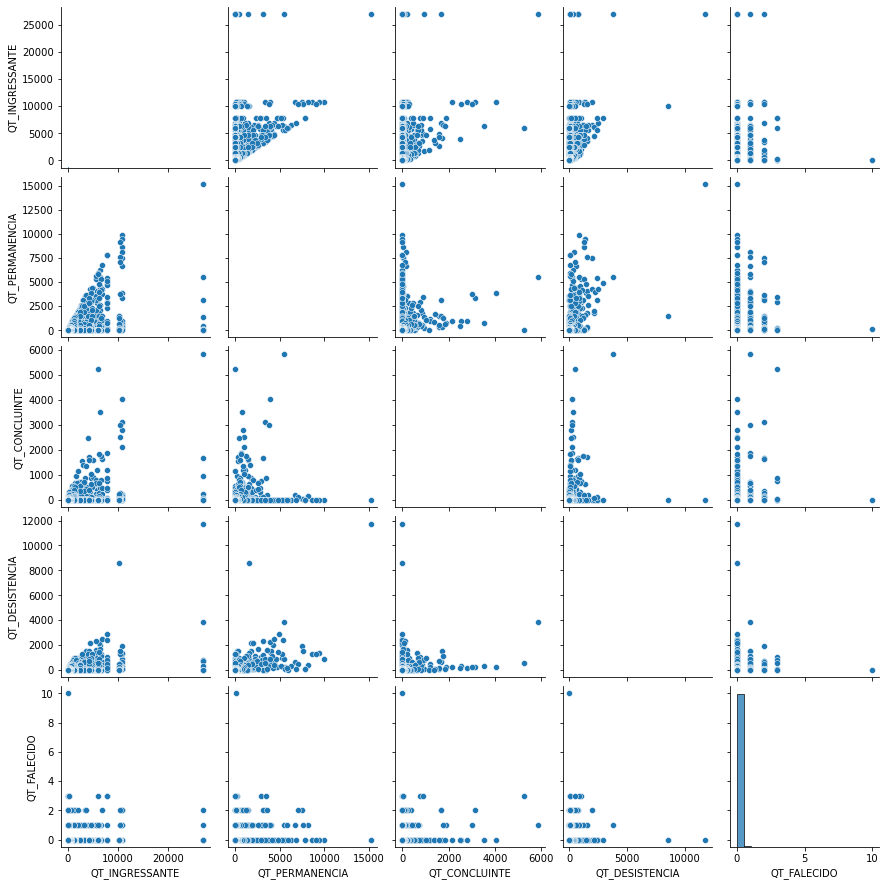

In [208]:
sns.pairplot(df_indicadores_bronze_pandas[['QT_INGRESSANTE', 'QT_PERMANENCIA', 'QT_CONCLUINTE', 'QT_DESISTENCIA', 'QT_FALECIDO']])

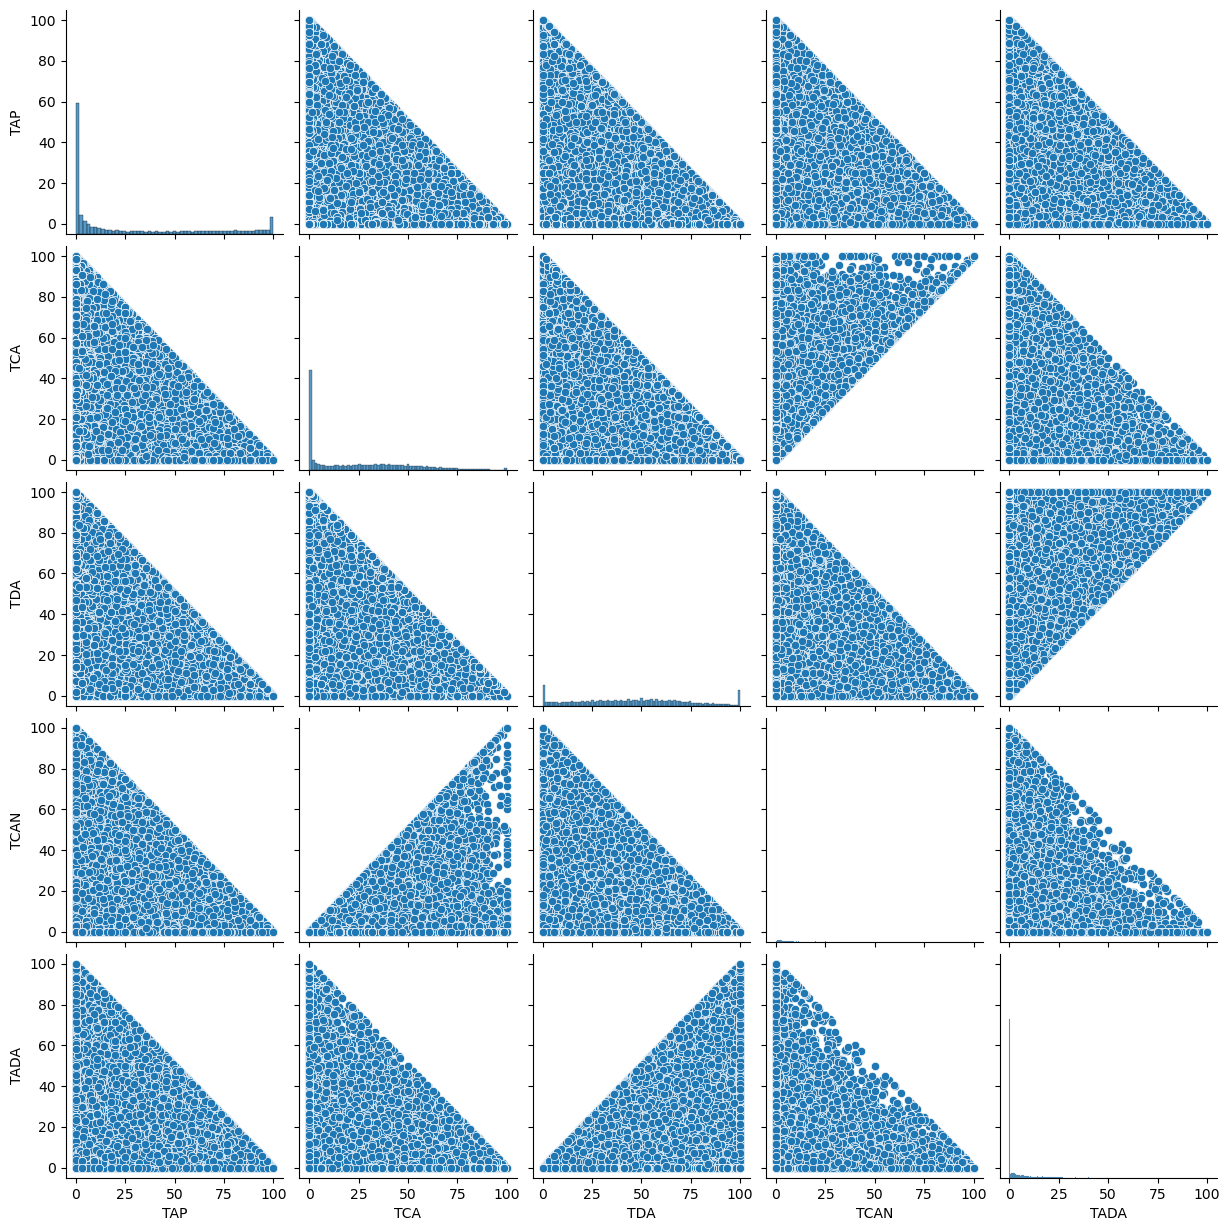

In [6]:
sns.pairplot(df_indicadores_bronze_pandas[['TAP', 'TCA', 'TDA', 'TCAN', 'TADA']])

<h1>Verificação de Outliers das variáveis Quantitativas</h1>

In [40]:
def check_outlier(dataframe, variavel):
    Q1 = dataframe[variavel].quantile(0.25)
    Q3 = dataframe[variavel].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[variavel] < limite_inferior) | (dataframe[variavel] > limite_superior)]
    
    print(f"---------- {variavel} ----------")
    print("Limite Inferior:", limite_inferior)
    print("Limite Superior:", limite_superior)
    print("Número de Outliers:", len(outliers))
    print(f"--------------------------------\n")
    

In [41]:
def grafboxplot(dataframe, variavel):
    
    df_column = dataframe[[variavel]].copy()
    df_column = df_column.sort_values(by=variavel)

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")  # Definindo um estilo
    sns.set_palette("tab20")    # Escolhendo uma paleta de cores

    sns.boxplot(x=variavel, data=df_column)

    # Calcular limites e outliers
    Q1 = df_column[variavel].quantile(0.25)
    Q3 = df_column[variavel].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_column[(df_column[variavel] < limite_inferior) | (df_column[variavel] > limite_superior)]

    plt.annotate(f"Limite Inferior: {limite_inferior:.2f}", xy=(0.15, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(f"Limite Superior: {limite_superior:.2f}", xy=(0.15, 0.85), xycoords='axes fraction', fontsize=12)
    plt.annotate(f"Número de Outliers: {len(outliers)}", xy=(0.15, 0.8), xycoords='axes fraction', fontsize=12)

    plt.title(f"Box Plot - Identificação de Outliers {variavel}", fontsize=16)
    plt.xlabel(f"{variavel}", fontsize=14)
    plt.ylabel("Valores", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.show()

In [42]:
def graf_boxplot_grupo(dataframe, variavel, grupo):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")

    sns.boxplot(x=grupo, y=variavel, data=dataframe, palette="Paired", linewidth=2.5)  # Ajuste o valor de linewidth

    plt.title(f"Box Plot por Grupos - {grupo} vs {variavel}", fontsize=16)
    plt.xlabel(f"{grupo}", fontsize=14)
    plt.ylabel(f"{variavel}", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    sns.despine()

    plt.show()


In [43]:
def graf_bar(dataframe, variavel, grupo):
    df = dataframe.copy()
    df = df[[grupo, variavel]].groupby([grupo]).sum().reset_index()
    
    # Calcular a soma total da variável para normalização
    total_sum = df[variavel].sum()
    
    # Calcular os valores percentuais
    df['Percentual'] = (df[variavel] / total_sum) * 100
    
    # Criar o gráfico de barras com os valores percentuais
    plt.bar(df[grupo], df['Percentual'], color='#6ADBD9')  # Definindo a cor das barras
    
    plt.title(f"Percentual {variavel} vs {grupo}")
    plt.xlabel(f"{grupo}")
    plt.ylabel(f"Percentual do Total")
    
    # Definir o limite máximo do eixo Y para 100%
    plt.ylim(0, 100)
    
    # Adicionar rótulos no topo das barras com espaço
    label_offset = 2
    for index, row in df.iterrows():
        plt.text(row[grupo], row['Percentual'] + label_offset, f"{row['Percentual']:.2f}%", ha='center', va='bottom')
    
    # Criar inclinação de 45 graus para os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Remover as linhas verticais da grade
    plt.gca().xaxis.grid(False)
    
    # Mostrar o gráfico
    plt.show()
    
    # Imprimir as quantidades em cada grupo logo abaixo do gráfico
    # print("Variável")
    print(f"{grupo}  | Quantidade")
    for index, row in df.iterrows():
    #     print(f"{grupo} {row[grupo].astype(int)}: {row[variavel]:.0f}")
        quantidade_formatada = '{:,.0f}'.format(row[variavel]).replace(',', '.')  # Formatação com ponto de milhar
        print(f"{grupo} {row[grupo].astype(int)}: {quantidade_formatada}")


In [44]:
# [['QT_INGRESSANTE', 'QT_PERMANENCIA', 'QT_CONCLUINTE', 'QT_DESISTENCIA', 'QT_FALECIDO']]

check_outlier(df_indicadores_bronze_pandas, "QT_INGRESSANTE")
check_outlier(df_indicadores_bronze_pandas, "QT_PERMANENCIA")
check_outlier(df_indicadores_bronze_pandas, "QT_CONCLUINTE")
check_outlier(df_indicadores_bronze_pandas, "QT_DESISTENCIA")
check_outlier(df_indicadores_bronze_pandas, "QT_FALECIDO")

---------- QT_INGRESSANTE ----------
Limite Inferior: -73.0
Limite Superior: 207.0
Número de Outliers: 21070
--------------------------------

---------- QT_PERMANENCIA ----------
Limite Inferior: -46.5
Limite Superior: 77.5
Número de Outliers: 23104
--------------------------------

---------- QT_CONCLUINTE ----------
Limite Inferior: -3.0
Limite Superior: 5.0
Número de Outliers: 38068
--------------------------------

---------- QT_DESISTENCIA ----------
Limite Inferior: -7.5
Limite Superior: 12.5
Número de Outliers: 27507
--------------------------------

---------- QT_FALECIDO ----------
Limite Inferior: 0.0
Limite Superior: 0.0
Número de Outliers: 1133
--------------------------------



In [45]:
# 'TAP', 'TCA', 'TDA', 'TCAN', 'TADA'

check_outlier(df_indicadores_bronze_pandas, "TAP")
check_outlier(df_indicadores_bronze_pandas, "TCA")
check_outlier(df_indicadores_bronze_pandas, "TDA")
check_outlier(df_indicadores_bronze_pandas, "TCAN")
check_outlier(df_indicadores_bronze_pandas, "TADA")

---------- TAP ----------
Limite Inferior: -87.87737449118046
Limite Superior: 146.4622908186341
Número de Outliers: 0
--------------------------------

---------- TCA ----------
Limite Inferior: -66.27906976744185
Limite Superior: 110.46511627906976
Número de Outliers: 0
--------------------------------

---------- TDA ----------
Limite Inferior: -39.51030927835052
Limite Superior: 127.70618556701032
Número de Outliers: 0
--------------------------------

---------- TCAN ----------
Limite Inferior: -4.411764705882353
Limite Superior: 7.352941176470589
Número de Outliers: 39675
--------------------------------

---------- TADA ----------
Limite Inferior: -10.714285714285715
Limite Superior: 17.857142857142858
Número de Outliers: 24612
--------------------------------



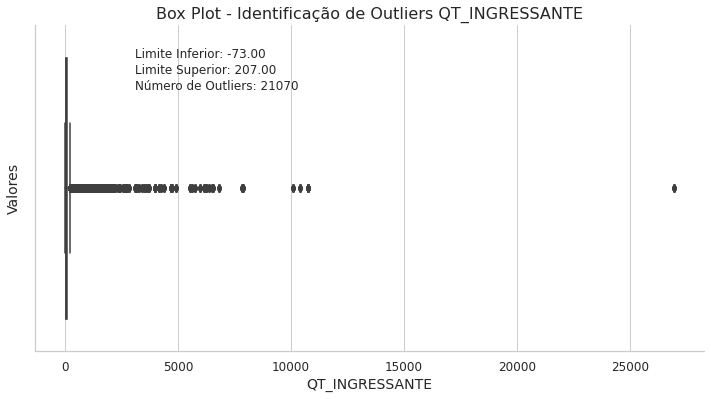

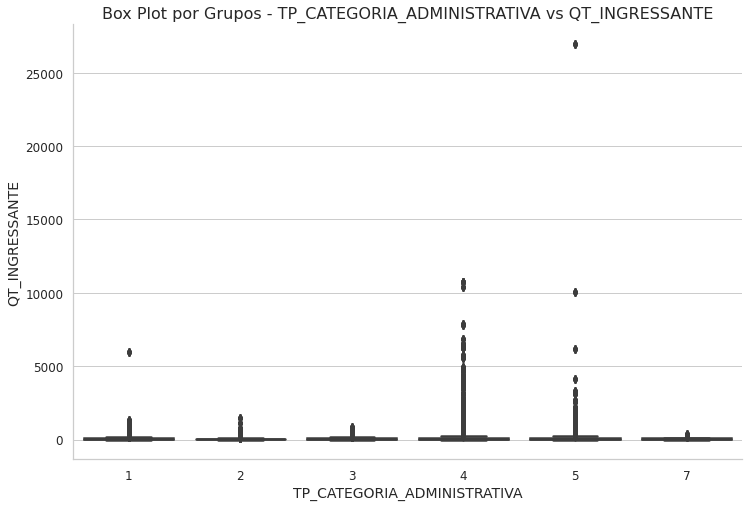

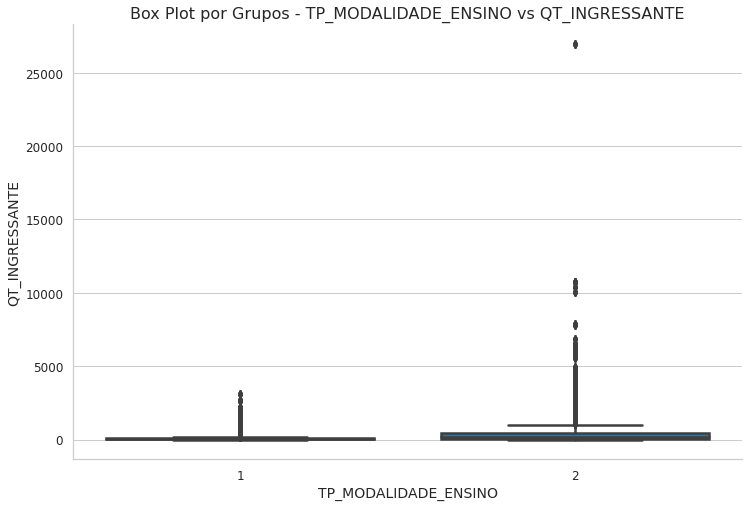

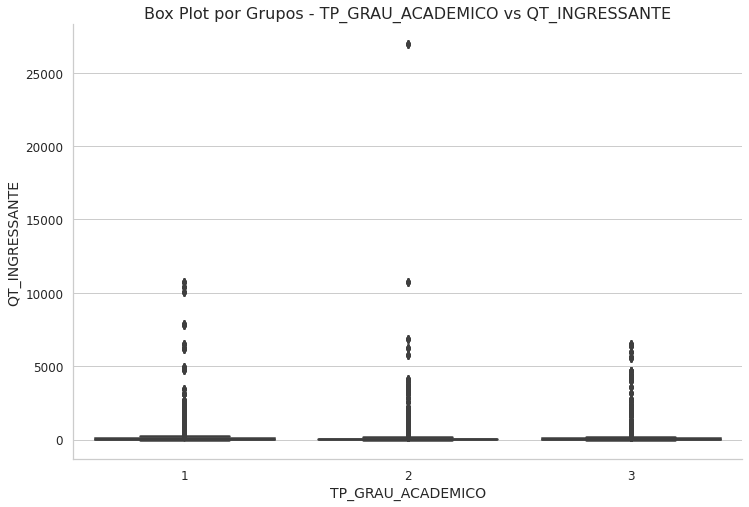

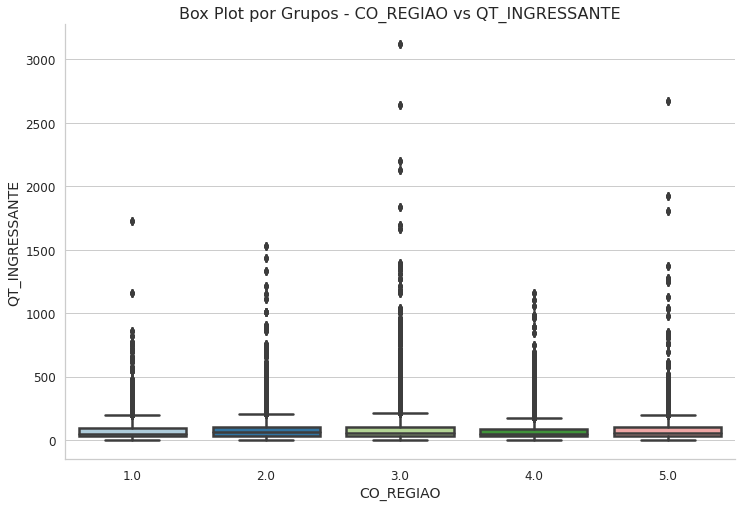

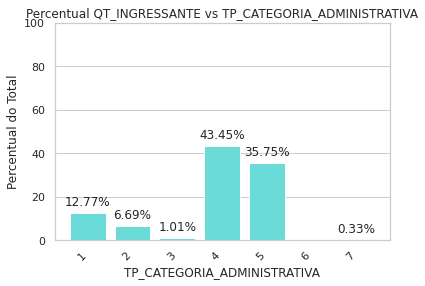

TP_CATEGORIA_ADMINISTRATIVA  | Quantidade
TP_CATEGORIA_ADMINISTRATIVA 1: 3.287.080
TP_CATEGORIA_ADMINISTRATIVA 2: 1.720.670
TP_CATEGORIA_ADMINISTRATIVA 3: 260.910
TP_CATEGORIA_ADMINISTRATIVA 4: 11.181.800
TP_CATEGORIA_ADMINISTRATIVA 5: 9.199.310
TP_CATEGORIA_ADMINISTRATIVA 7: 84.720


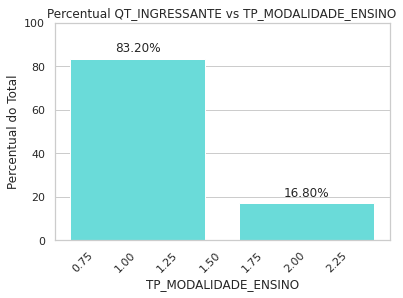

TP_MODALIDADE_ENSINO  | Quantidade
TP_MODALIDADE_ENSINO 1: 21.411.500
TP_MODALIDADE_ENSINO 2: 4.322.990


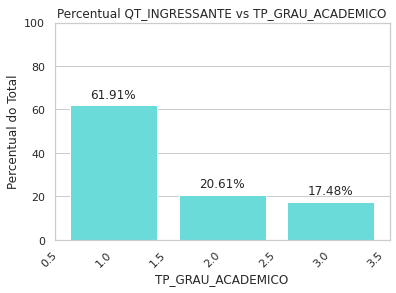

TP_GRAU_ACADEMICO  | Quantidade
TP_GRAU_ACADEMICO 1: 15.933.240
TP_GRAU_ACADEMICO 2: 5.303.260
TP_GRAU_ACADEMICO 3: 4.497.990


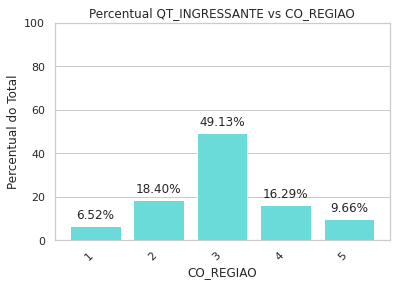

CO_REGIAO  | Quantidade
CO_REGIAO 1: 1.396.900
CO_REGIAO 2: 3.938.900
CO_REGIAO 3: 10.520.180
CO_REGIAO 4: 3.488.210
CO_REGIAO 5: 2.067.310


In [46]:
grafboxplot(df_indicadores_bronze_pandas, "QT_INGRESSANTE")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_INGRESSANTE", "TP_CATEGORIA_ADMINISTRATIVA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_INGRESSANTE", "TP_MODALIDADE_ENSINO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_INGRESSANTE", "TP_GRAU_ACADEMICO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_INGRESSANTE", "CO_REGIAO")
graf_bar(df_indicadores_bronze_pandas, 'QT_INGRESSANTE', 'TP_CATEGORIA_ADMINISTRATIVA')
graf_bar(df_indicadores_bronze_pandas, 'QT_INGRESSANTE', 'TP_MODALIDADE_ENSINO')
graf_bar(df_indicadores_bronze_pandas, 'QT_INGRESSANTE', 'TP_GRAU_ACADEMICO')
graf_bar(df_indicadores_bronze_pandas, 'QT_INGRESSANTE', 'CO_REGIAO')

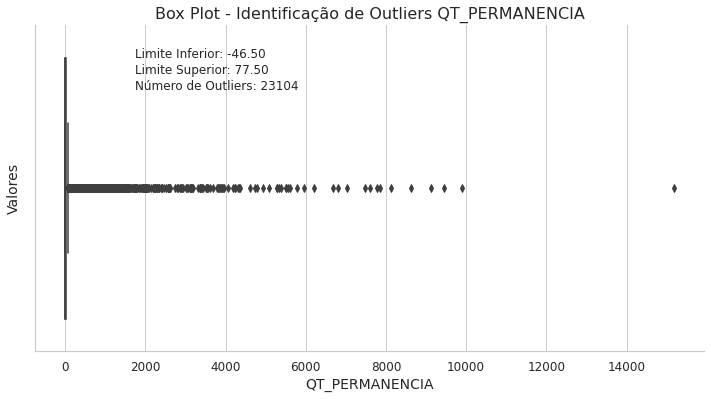

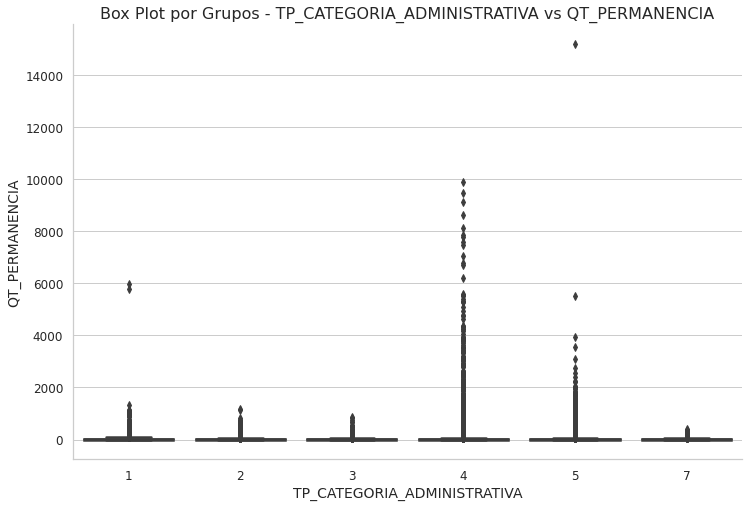

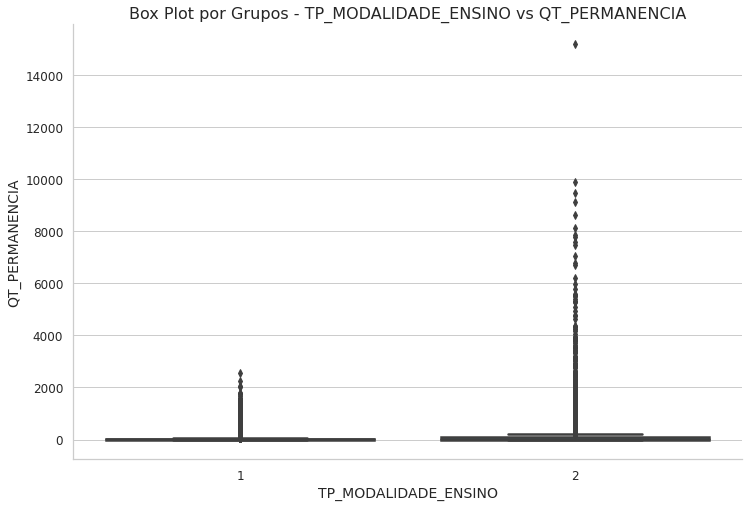

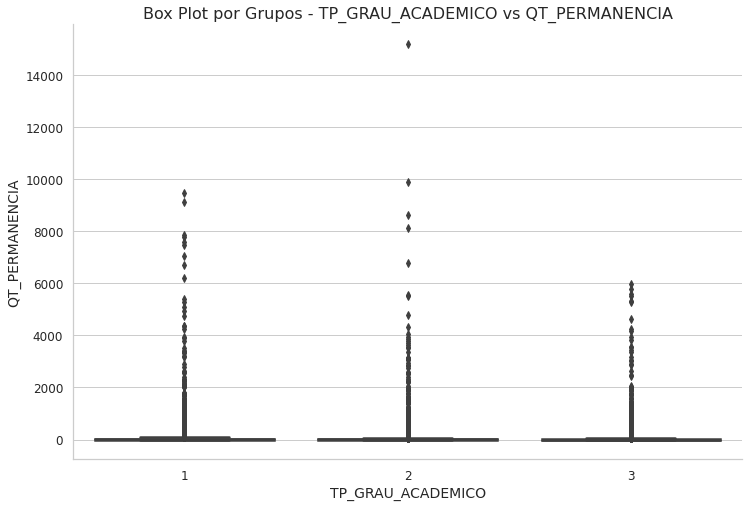

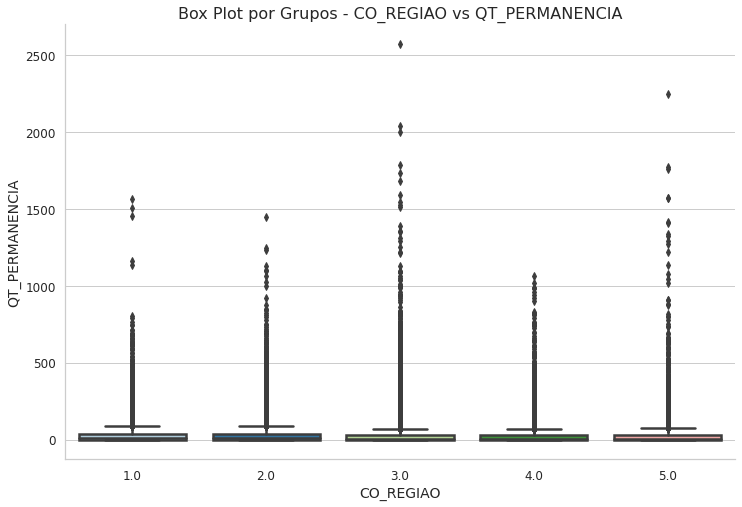

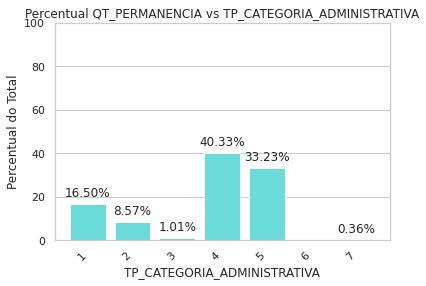

TP_CATEGORIA_ADMINISTRATIVA  | Quantidade
TP_CATEGORIA_ADMINISTRATIVA 1: 1.217.458
TP_CATEGORIA_ADMINISTRATIVA 2: 632.663
TP_CATEGORIA_ADMINISTRATIVA 3: 74.336
TP_CATEGORIA_ADMINISTRATIVA 4: 2.975.863
TP_CATEGORIA_ADMINISTRATIVA 5: 2.452.300
TP_CATEGORIA_ADMINISTRATIVA 7: 26.693


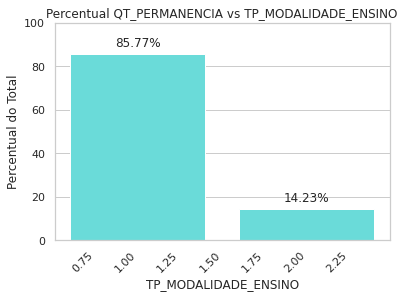

TP_MODALIDADE_ENSINO  | Quantidade
TP_MODALIDADE_ENSINO 1: 6.329.022
TP_MODALIDADE_ENSINO 2: 1.050.291


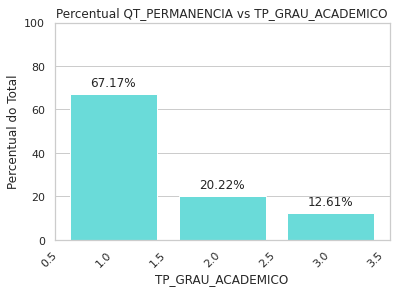

TP_GRAU_ACADEMICO  | Quantidade
TP_GRAU_ACADEMICO 1: 4.957.051
TP_GRAU_ACADEMICO 2: 1.491.845
TP_GRAU_ACADEMICO 3: 930.417


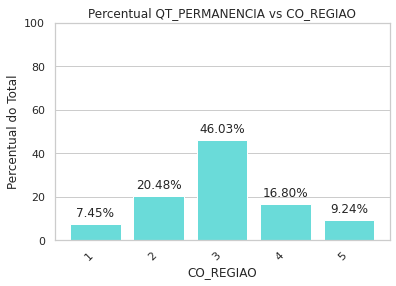

CO_REGIAO  | Quantidade
CO_REGIAO 1: 471.443
CO_REGIAO 2: 1.296.268
CO_REGIAO 3: 2.913.465
CO_REGIAO 4: 1.063.231
CO_REGIAO 5: 584.615


In [47]:
grafboxplot(df_indicadores_bronze_pandas, "QT_PERMANENCIA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_PERMANENCIA", "TP_CATEGORIA_ADMINISTRATIVA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_PERMANENCIA", "TP_MODALIDADE_ENSINO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_PERMANENCIA", "TP_GRAU_ACADEMICO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_PERMANENCIA", "CO_REGIAO")
graf_bar(df_indicadores_bronze_pandas, 'QT_PERMANENCIA', 'TP_CATEGORIA_ADMINISTRATIVA')
graf_bar(df_indicadores_bronze_pandas, 'QT_PERMANENCIA', 'TP_MODALIDADE_ENSINO')
graf_bar(df_indicadores_bronze_pandas, 'QT_PERMANENCIA', 'TP_GRAU_ACADEMICO')
graf_bar(df_indicadores_bronze_pandas, 'QT_PERMANENCIA', 'CO_REGIAO')

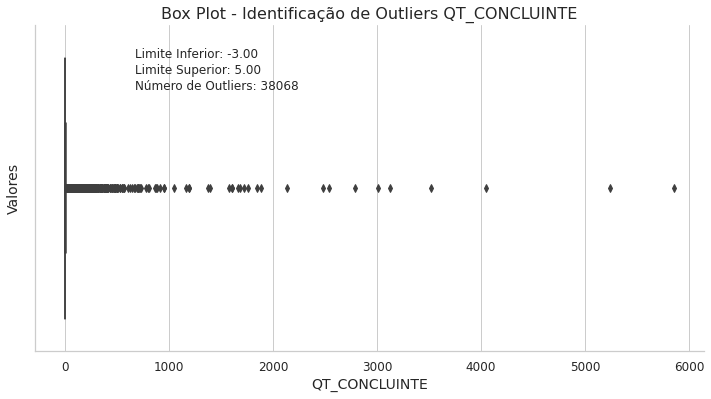

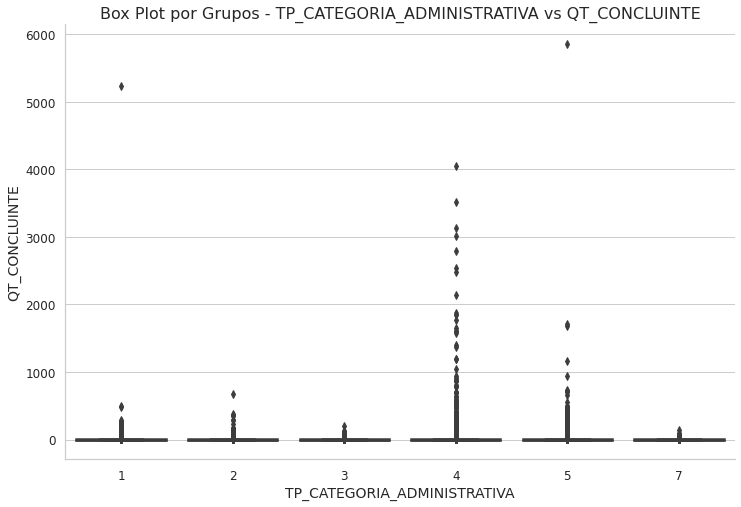

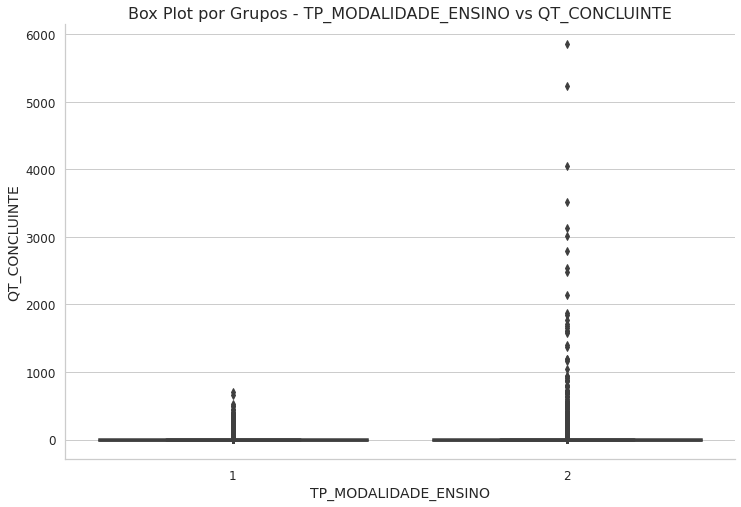

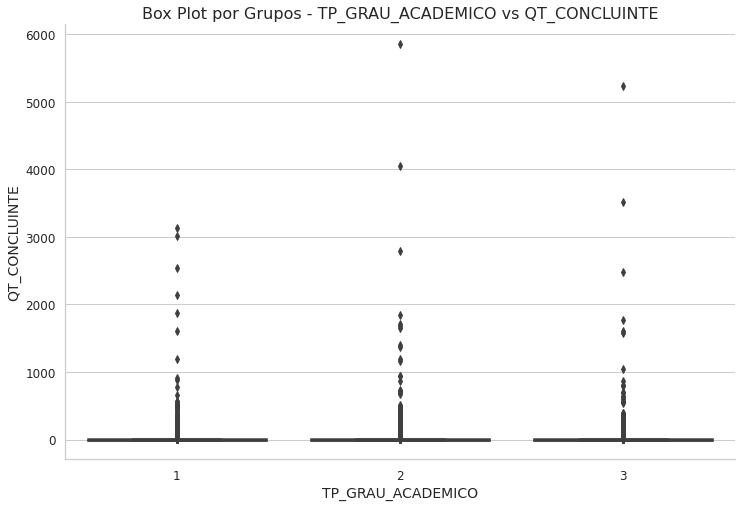

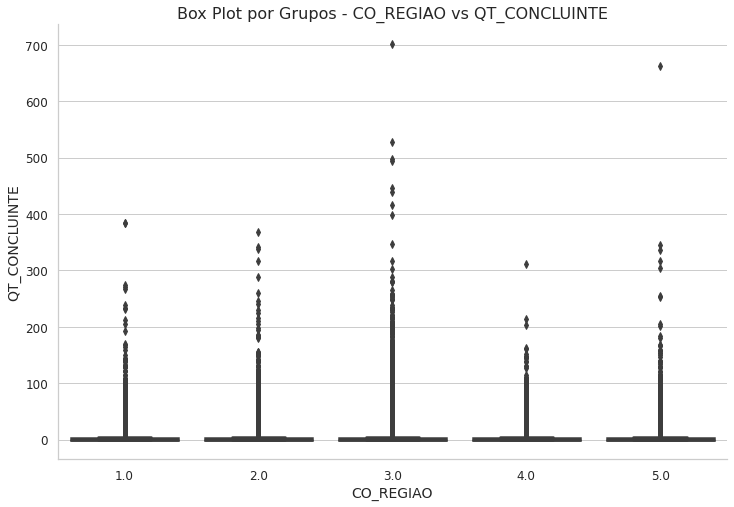

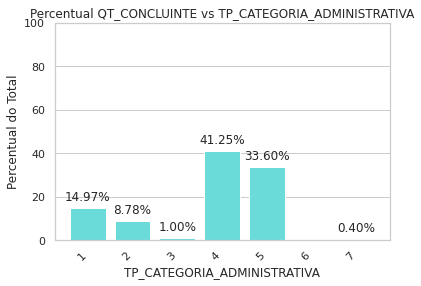

TP_CATEGORIA_ADMINISTRATIVA  | Quantidade
TP_CATEGORIA_ADMINISTRATIVA 1: 152.501
TP_CATEGORIA_ADMINISTRATIVA 2: 89.474
TP_CATEGORIA_ADMINISTRATIVA 3: 10.138
TP_CATEGORIA_ADMINISTRATIVA 4: 420.180
TP_CATEGORIA_ADMINISTRATIVA 5: 342.287
TP_CATEGORIA_ADMINISTRATIVA 7: 4.069


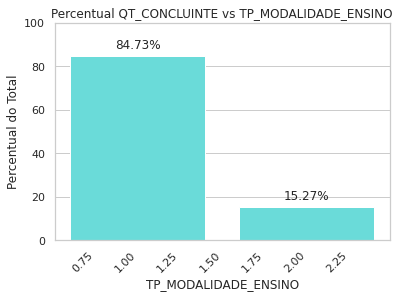

TP_MODALIDADE_ENSINO  | Quantidade
TP_MODALIDADE_ENSINO 1: 863.099
TP_MODALIDADE_ENSINO 2: 155.550


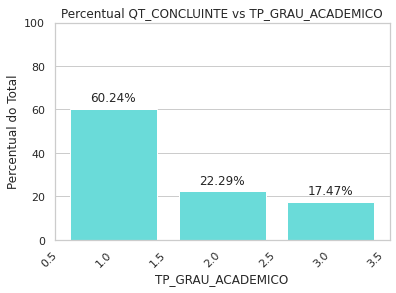

TP_GRAU_ACADEMICO  | Quantidade
TP_GRAU_ACADEMICO 1: 613.638
TP_GRAU_ACADEMICO 2: 227.011
TP_GRAU_ACADEMICO 3: 178.000


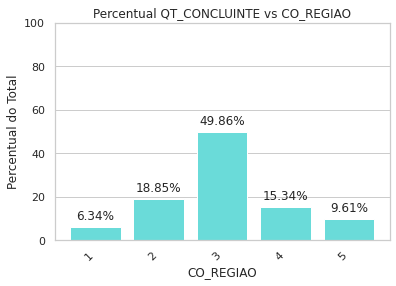

CO_REGIAO  | Quantidade
CO_REGIAO 1: 54.686
CO_REGIAO 2: 162.736
CO_REGIAO 3: 430.304
CO_REGIAO 4: 132.388
CO_REGIAO 5: 82.985


In [48]:
grafboxplot(df_indicadores_bronze_pandas, "QT_CONCLUINTE")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_CONCLUINTE", "TP_CATEGORIA_ADMINISTRATIVA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_CONCLUINTE", "TP_MODALIDADE_ENSINO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_CONCLUINTE", "TP_GRAU_ACADEMICO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_CONCLUINTE", "CO_REGIAO")
graf_bar(df_indicadores_bronze_pandas, 'QT_CONCLUINTE', 'TP_CATEGORIA_ADMINISTRATIVA')
graf_bar(df_indicadores_bronze_pandas, 'QT_CONCLUINTE', 'TP_MODALIDADE_ENSINO')
graf_bar(df_indicadores_bronze_pandas, 'QT_CONCLUINTE', 'TP_GRAU_ACADEMICO')
graf_bar(df_indicadores_bronze_pandas, 'QT_CONCLUINTE', 'CO_REGIAO')

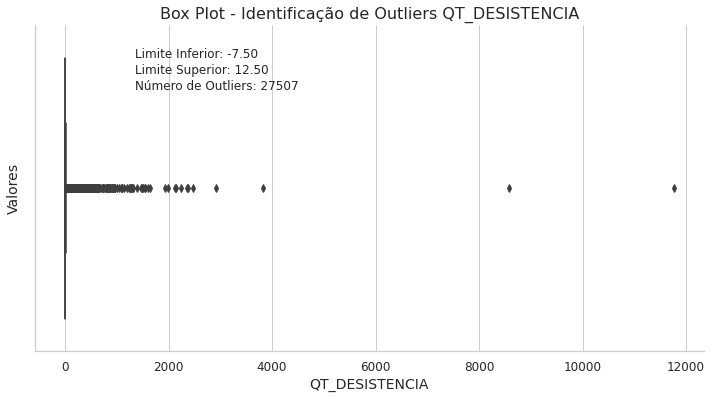

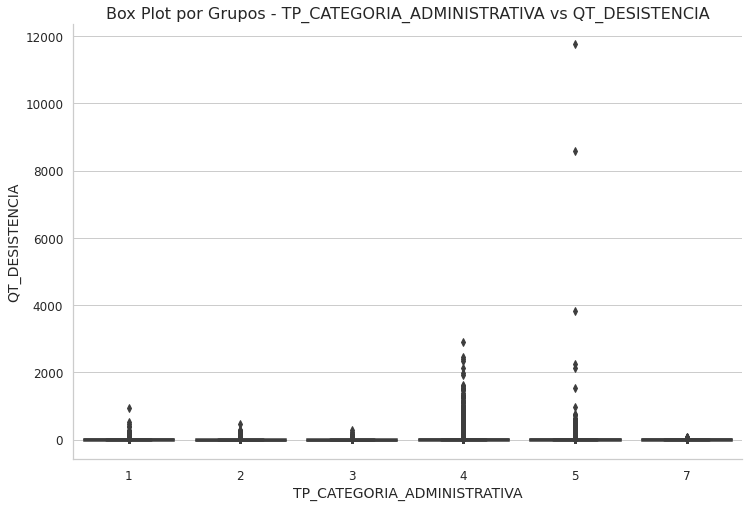

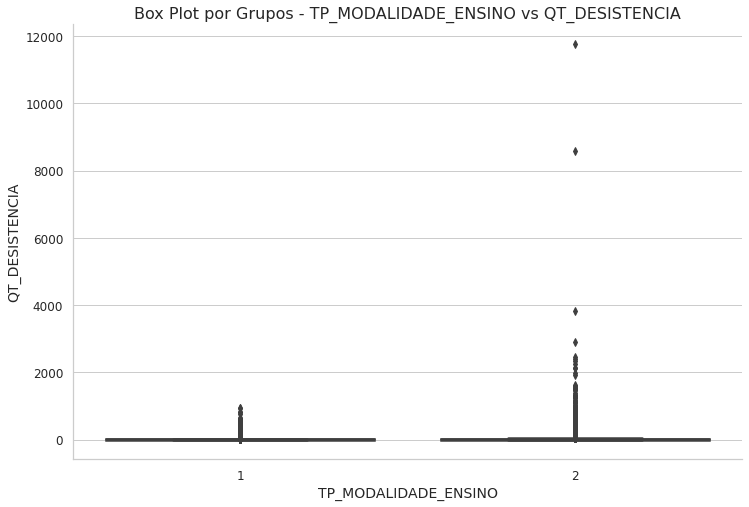

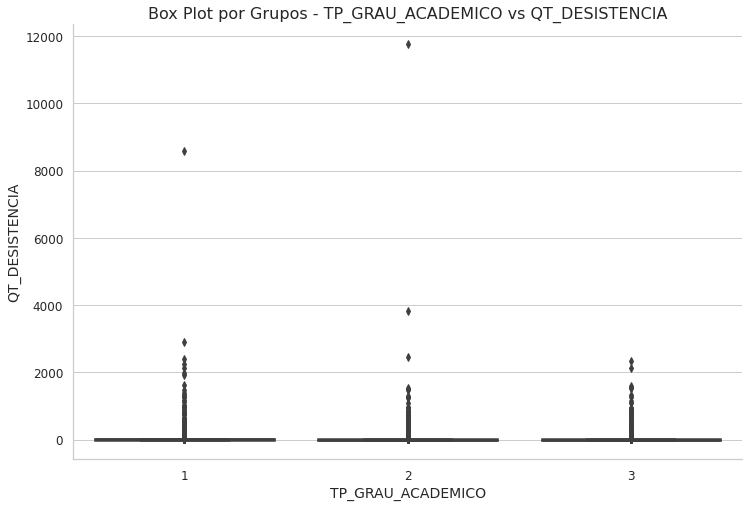

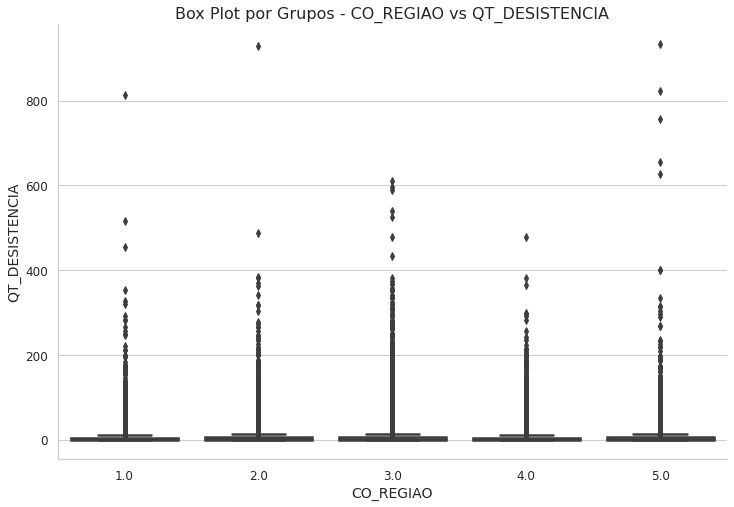

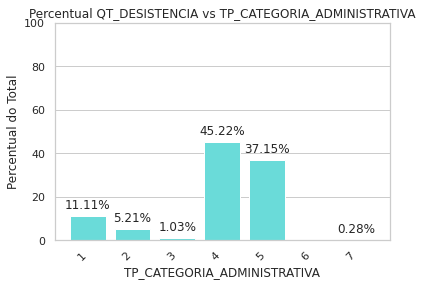

TP_CATEGORIA_ADMINISTRATIVA  | Quantidade
TP_CATEGORIA_ADMINISTRATIVA 1: 170.031
TP_CATEGORIA_ADMINISTRATIVA 2: 79.702
TP_CATEGORIA_ADMINISTRATIVA 3: 15.834
TP_CATEGORIA_ADMINISTRATIVA 4: 692.101
TP_CATEGORIA_ADMINISTRATIVA 5: 568.538
TP_CATEGORIA_ADMINISTRATIVA 7: 4.235


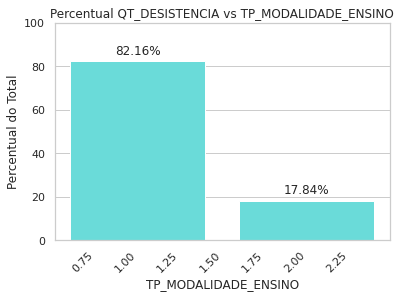

TP_MODALIDADE_ENSINO  | Quantidade
TP_MODALIDADE_ENSINO 1: 1.257.363
TP_MODALIDADE_ENSINO 2: 273.078


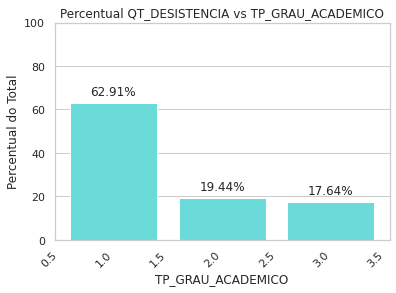

TP_GRAU_ACADEMICO  | Quantidade
TP_GRAU_ACADEMICO 1: 962.861
TP_GRAU_ACADEMICO 2: 297.551
TP_GRAU_ACADEMICO 3: 270.029


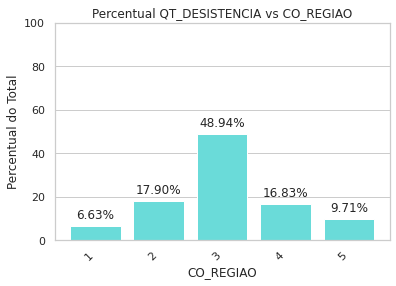

CO_REGIAO  | Quantidade
CO_REGIAO 1: 83.321
CO_REGIAO 2: 225.037
CO_REGIAO 3: 615.296
CO_REGIAO 4: 211.642
CO_REGIAO 5: 122.067


In [49]:
grafboxplot(df_indicadores_bronze_pandas, "QT_DESISTENCIA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_DESISTENCIA", "TP_CATEGORIA_ADMINISTRATIVA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_DESISTENCIA", "TP_MODALIDADE_ENSINO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_DESISTENCIA", "TP_GRAU_ACADEMICO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_DESISTENCIA", "CO_REGIAO")
graf_bar(df_indicadores_bronze_pandas, 'QT_DESISTENCIA', 'TP_CATEGORIA_ADMINISTRATIVA')
graf_bar(df_indicadores_bronze_pandas, 'QT_DESISTENCIA', 'TP_MODALIDADE_ENSINO')
graf_bar(df_indicadores_bronze_pandas, 'QT_DESISTENCIA', 'TP_GRAU_ACADEMICO')
graf_bar(df_indicadores_bronze_pandas, 'QT_DESISTENCIA', 'CO_REGIAO')

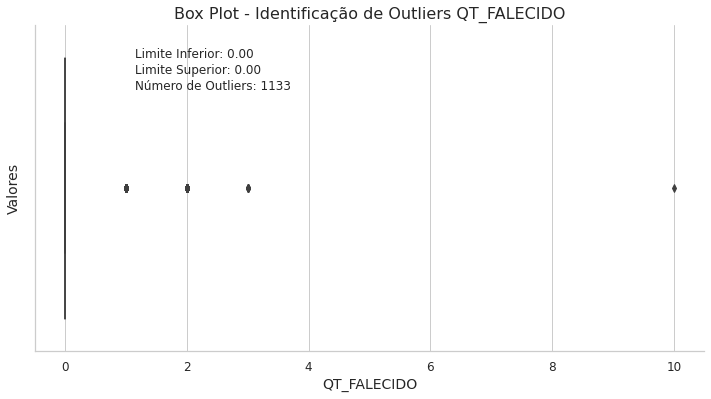

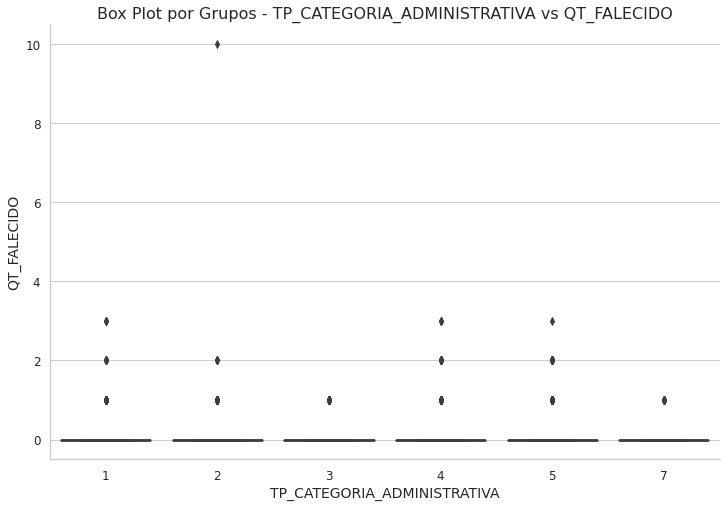

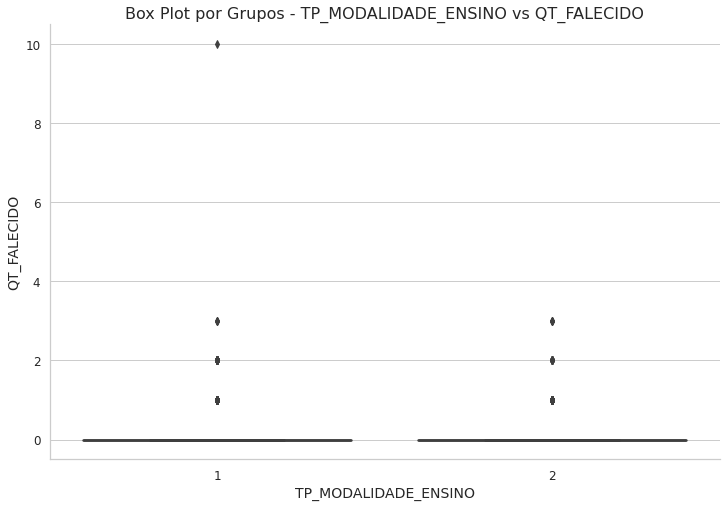

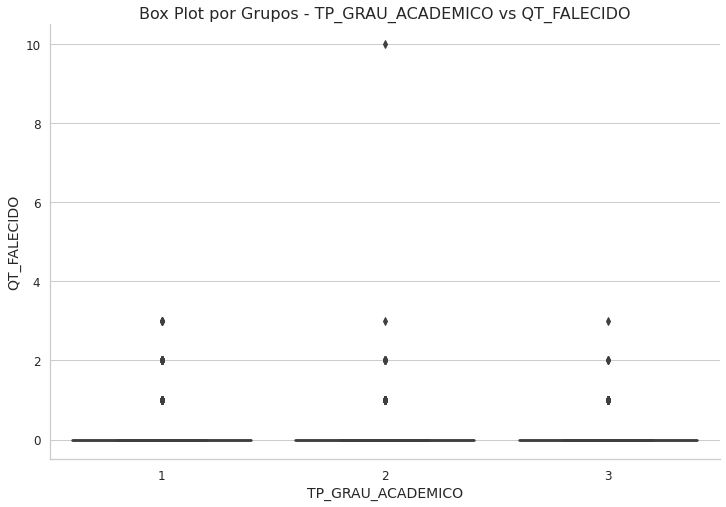

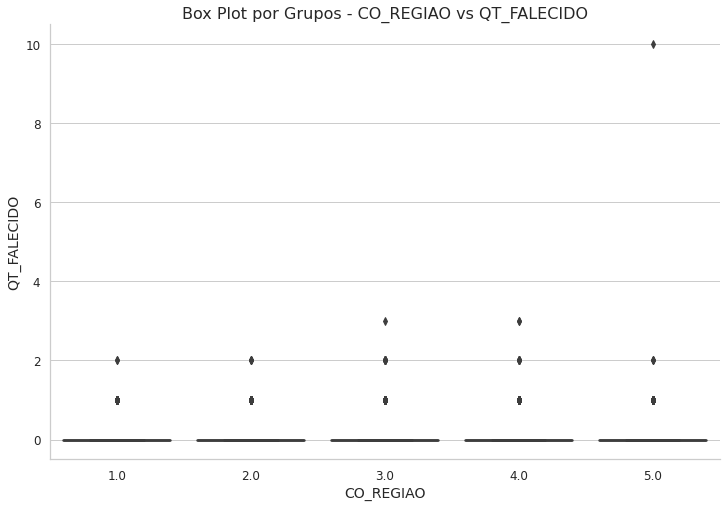

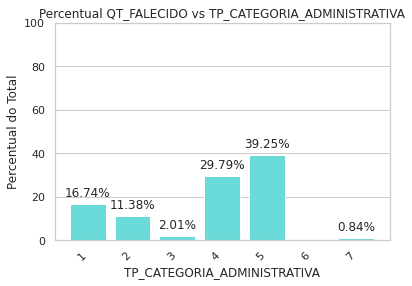

TP_CATEGORIA_ADMINISTRATIVA  | Quantidade
TP_CATEGORIA_ADMINISTRATIVA 1: 200
TP_CATEGORIA_ADMINISTRATIVA 2: 136
TP_CATEGORIA_ADMINISTRATIVA 3: 24
TP_CATEGORIA_ADMINISTRATIVA 4: 356
TP_CATEGORIA_ADMINISTRATIVA 5: 469
TP_CATEGORIA_ADMINISTRATIVA 7: 10


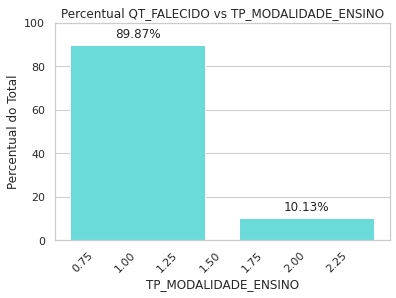

TP_MODALIDADE_ENSINO  | Quantidade
TP_MODALIDADE_ENSINO 1: 1.074
TP_MODALIDADE_ENSINO 2: 121


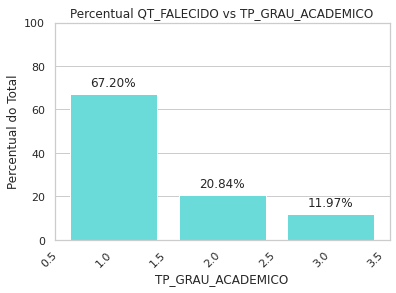

TP_GRAU_ACADEMICO  | Quantidade
TP_GRAU_ACADEMICO 1: 803
TP_GRAU_ACADEMICO 2: 249
TP_GRAU_ACADEMICO 3: 143


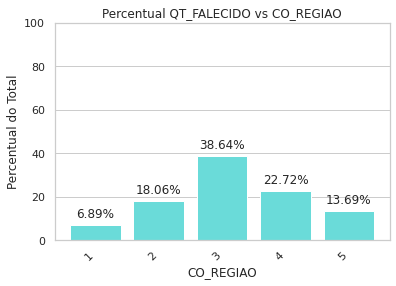

CO_REGIAO  | Quantidade
CO_REGIAO 1: 74
CO_REGIAO 2: 194
CO_REGIAO 3: 415
CO_REGIAO 4: 244
CO_REGIAO 5: 147


In [50]:
grafboxplot(df_indicadores_bronze_pandas, "QT_FALECIDO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_FALECIDO", "TP_CATEGORIA_ADMINISTRATIVA")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_FALECIDO", "TP_MODALIDADE_ENSINO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_FALECIDO", "TP_GRAU_ACADEMICO")
graf_boxplot_grupo(df_indicadores_bronze_pandas, "QT_FALECIDO", "CO_REGIAO")
graf_bar(df_indicadores_bronze_pandas, 'QT_FALECIDO', 'TP_CATEGORIA_ADMINISTRATIVA')
graf_bar(df_indicadores_bronze_pandas, 'QT_FALECIDO', 'TP_MODALIDADE_ENSINO')
graf_bar(df_indicadores_bronze_pandas, 'QT_FALECIDO', 'TP_GRAU_ACADEMICO')
graf_bar(df_indicadores_bronze_pandas, 'QT_FALECIDO', 'CO_REGIAO')